# Exploratory Data Analysis of the Hotel Booking

### Dataset: https://raw.githubusercontent.com/Premalatha-success/-Practice/main/hotel_bookings.csv

### We will try to answer the following Questions
### 1. How Many Booking Were Cancelled?
###  2. What is the booking ratio between Resort Hotel and City Hotel?
###  3. What is the percentage of booking for each year?
###  4. Which is the busiest month for hotels?
###  5. From which country most guests come?
###  6. How Long People Stay in the hotel?
###  7. Which was the most booked accommodation type (Single, Couple, Family)?
###  8. Predictive model to make predictions in the future whether the booking will be cancelled or not

# Import Packages
### First Import necessary packages and import the dataset

In [13]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pycountry as pc
import matplotlib.ticker as mtick
from sklearn.model_selection import train_test_split

pd.options.display.max_columns=None
pd.options.display.max_rows=None
pd.options.display.width=None

In [14]:
## Importing Data
url = "https://raw.githubusercontent.com/Premalatha-success/-Practice/main/hotel_bookings.csv"
data = pd.read_csv(url)

## Show the first 5 rows of Data
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07-01-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07-01-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,07-02-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,07-02-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,07-03-2015


In [15]:
# information about the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [16]:
data.shape

(119390, 32)

### This data set contains booking information for a city hotel and a resort hotel and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things shaped in 119390 rows and 32 columns



# Data Preprocessing
### First copy the dataset, so our original dataset remains unchanged

In [17]:
## Copy the dataset
df = data.copy()

### 1. Dealing with Missing Values

#### Check if our data contains any missing values

In [18]:
df.isnull().sum().sort_values(ascending=False)[:10]

company                   112593
agent                      16340
country                      488
children                       4
reserved_room_type             0
assigned_room_type             0
booking_changes                0
deposit_type                   0
hotel                          0
previous_cancellations         0
dtype: int64

 We have 4 features with missing values.

 In the agent and the company column, we have id_number for each agent or company, so for all the missing values, we will just replace it with 0.

In [19]:
df[['agent','company']] = df[['agent','company']].fillna(0.0)

Children column contains the count of children, so we will replace all the missing values with the rounded mean value.And our country column contains country codes representing different countries. It is a categorical feature so I will also replace it with the mode value. The mode value is the value that appears more than any other value. So, in this case, I am replacing it with the country that appears the most often.

In [20]:
## For the missing values in the country column, replace it with mode (value that appears most often)
df['country'].fillna(data.country.mode().to_string(), inplace=True)


## for missing children value, replace it with rounded mean value
df['children'].fillna(round(data.children.mean()), inplace=True)

There are many rows that have zero guests including adults, children and babies. 

These type of rows does not make

In [21]:
df[(df.adults + df.children + df.babies) == 0].shape

(180, 32)

We have 180 such rows. we will just remove these rows.

In [22]:
df = df.drop(df[(df.adults+df.babies+df.children)==0].index)

### 2. Converting Datatype

### Let’s check the datatype of each column in our dataset.

In [23]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

#### We can see different data types for different columns.

#### There are some columns like children, company, and agent, that are float type but their values are only in integers.

#### So we will convert them to the integer type.

In [24]:
df[['children', 'company', 'agent']] = df[['children', 'company', 'agent']].astype('int64')

# Exploratory Data Analysis

### 1. How Many Booking Were Cancelled?
### Let’s write the function to get the percentage of different values.

In [25]:
def get_count(series, limit=None):
    
    if limit != None:
        series = series.value_counts()[:limit]
    else:
        series = series.value_counts()
    
    x = series.index
    y = series/series.sum()*100
    
    return x.values,y.values

This function takes a series or data frame column and returns the two arrays

x is our unique values

y is the percentage value of each unique value

Now let’s use this function on our is_canceled feature and see the result

In [26]:
x,y = get_count(df['is_canceled'])

In [27]:
x,y

(array([0, 1]), array([62.92341247, 37.07658753]))

is_canceled have two unique values: 1 if booking got canceled, else 0.

In [28]:
def plot(x, y, x_label=None,y_label=None, title=None, figsize=(8,7), type='bar'):
    
    sns.set_style('darkgrid')
    
    fig, ax = plt.subplots(figsize=figsize)
    
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    
    if x_label != None:
        ax.set_xlabel(x_label)
    
    if y_label != None:
        ax.set_ylabel(y_label)
        
    if title != None:
        ax.set_title(title)
    
    if type == 'bar':
        sns.barplot(x,y, ax = ax)
    elif type == 'line':
        sns.lineplot(x,y, ax = ax, sort=False)
        
    
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


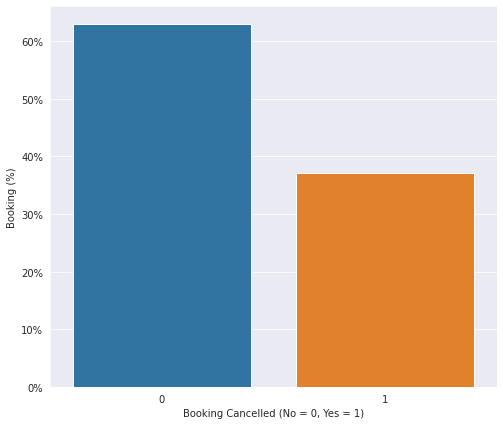

In [29]:
plot(x,y, x_label='Booking Cancelled (No = 0, Yes = 1)', y_label='Booking (%)')

## Bookings got canceled 37% of the time. While booking guest did checkd-in (did not cancel the booking ) almost 63% of the time.

For further analysis, We will select only those bookings which did not get canceled

In [30]:
df_not_canceled = df[df['is_canceled'] == 0]

## 2. What is the booking ratio between Resort Hotel and City Hotel?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


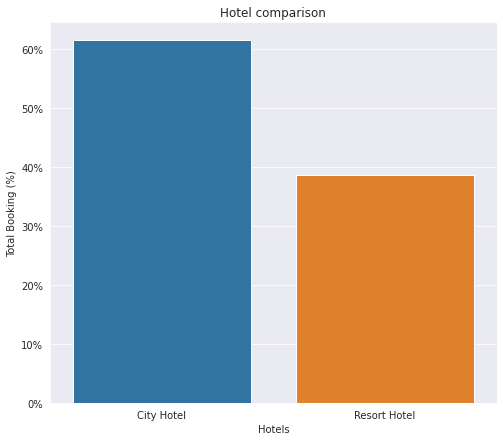

In [31]:
x,y = get_count(df_not_canceled['hotel'])
plot(x,y, x_label='Hotels', y_label='Total Booking (%)', title='Hotel comparison')

### More than 60% of the population booked the City hotel

## 3. What is the percentage of booking for each year?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


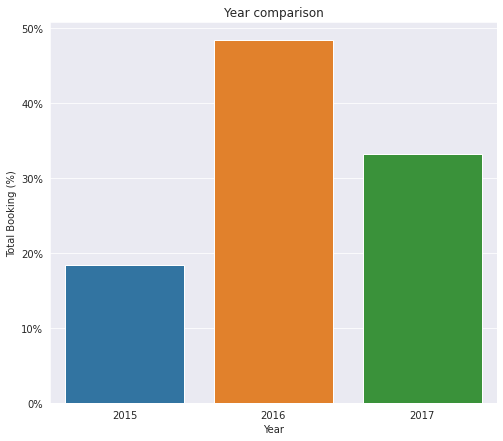

In [32]:
x,y = get_count(df_not_canceled['arrival_date_year'])
plot(x,y, x_label='Year', y_label='Total Booking (%)', title='Year comparison')

### More than double bookings were made in 2016, compared to the previous year. But the bookings decreased by almost 15% the next year.

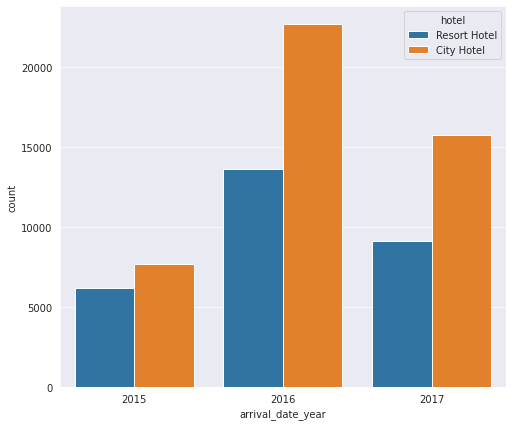

In [33]:
plt.subplots(figsize=(8,7))
sns.countplot(x='arrival_date_year', hue='hotel',  data=df_not_canceled);

## 4. Which is the busiest month for hotels?

### we will select the arrival_date_month feature and get its value count. Now the resulting data will not be sorted according to month order so we have to sort it. We will make the new list with the names of months in order to sort our data according to this list.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


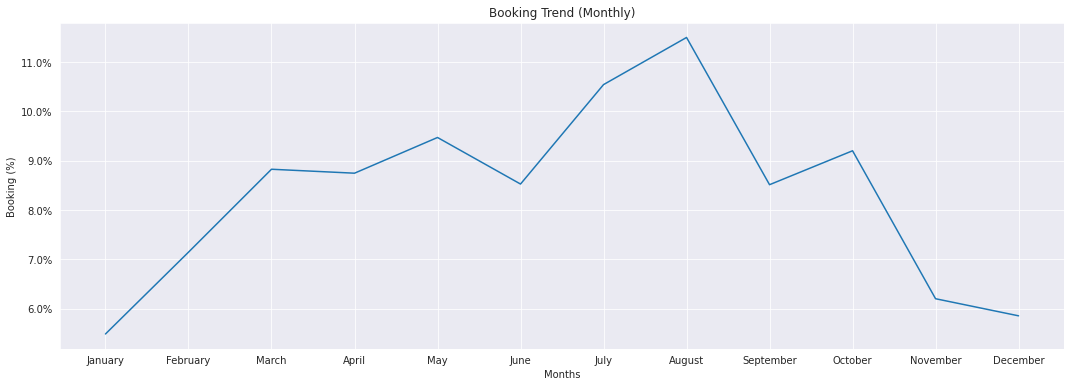

In [34]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
             'October', 'November', 'December']

sorted_months = df_not_canceled['arrival_date_month'].value_counts().reindex(new_order)

x = sorted_months.index
y = sorted_months/sorted_months.sum()*100


#sns.lineplot(x, y.values)
plot(x, y.values, x_label='Months', y_label='Booking (%)', title='Booking Trend (Monthly)', type='line', figsize=(18,6))


### As we can see most bookings were made from July to August. And the least bookings were made at the start and end of the year.

### Let’s separate the data for each hotel type and then see the trend.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


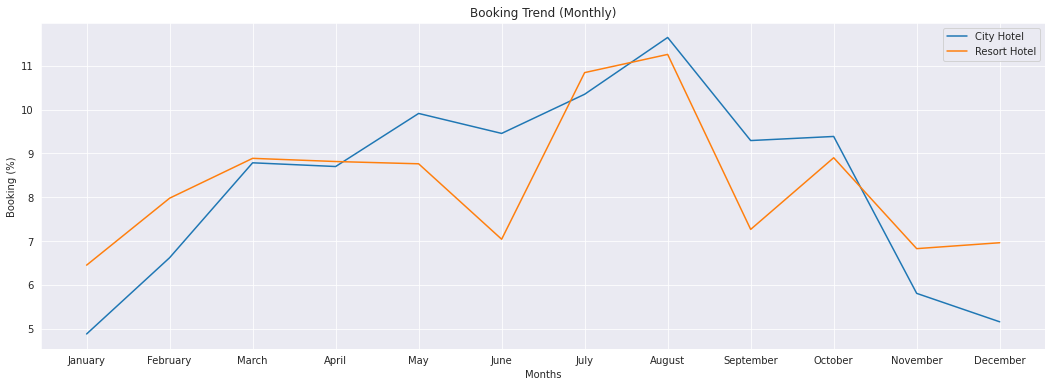

In [35]:
## Order of months
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 
             'November', 'December']


## Select only City Hotel
sorted_months = df_not_canceled.loc[df.hotel=='City Hotel' ,'arrival_date_month'].value_counts().reindex(new_order)

x1 = sorted_months.index
y1 = sorted_months/sorted_months.sum()*100



## Select only Resort Hotel
sorted_months = df_not_canceled.loc[df.hotel=='Resort Hotel' ,'arrival_date_month'].value_counts().reindex(new_order)

x2 = sorted_months.index
y2 = sorted_months/sorted_months.sum()*100






## Draw the line plot

fig, ax = plt.subplots(figsize=(18,6))

ax.set_xlabel('Months')
ax.set_ylabel('Booking (%)')
ax.set_title('Booking Trend (Monthly)')


sns.lineplot(x1, y1.values, label='City Hotel', sort=False)
sns.lineplot(x1, y2.values, label='Resort Hotel', sort=False)

plt.show()

### Resort has more bookings at the start and end of the year, and lower booking in June and September.

## 5. From which country most guests come?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


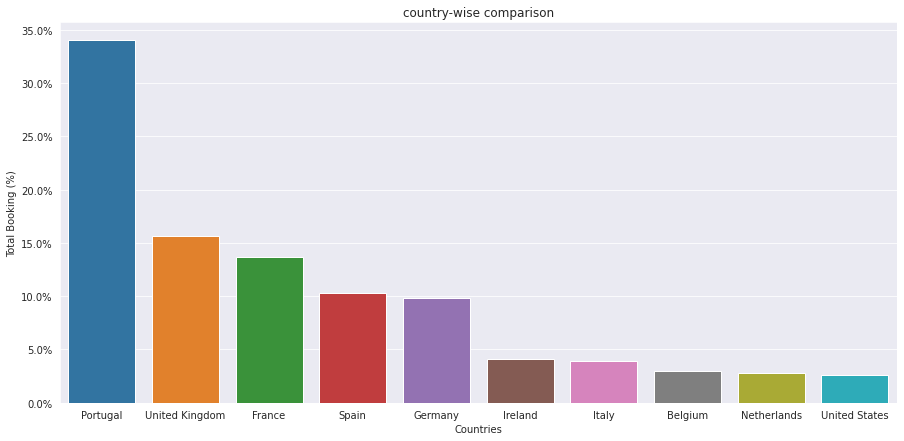

In [36]:
import pycountry as pc

x,y = get_count(df_not_canceled['country'], limit=10)

## For each country code select the country name 
country_name = [pc.countries.get(alpha_3=name).name for name in x]

plot(country_name,y, x_label='Countries', y_label='Total Booking (%)', title='country-wise comparison', figsize=(15,7))


### Portugal, UK and France, Spain and Germany are the top countries from most guests come, more than 80% come from these 5 countries.

## 6. How Long People Stay in the hotel?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


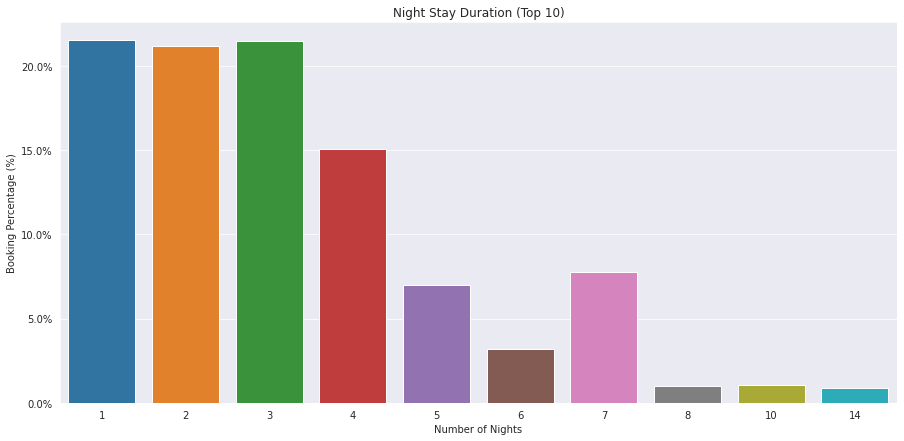

In [37]:
total_nights = df_not_canceled['stays_in_weekend_nights']+ df_not_canceled['stays_in_week_nights']
x,y = get_count(total_nights, limit=10)

plot(x,y, x_label='Number of Nights', y_label='Booking Percentage (%)', title='Night Stay Duration (Top 10)', figsize=(15,7))

### Most people stay for one, two, or three. More than 60% of guests come under these three options.

### Let’s see the stay duration trend for each hotel type.

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


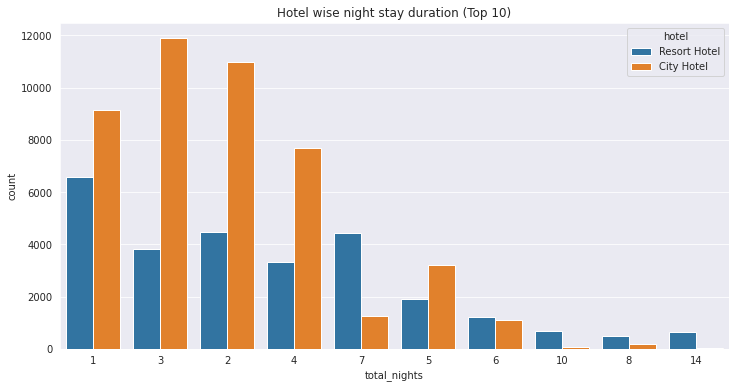

In [38]:
df_not_canceled.loc[:,'total_nights'] = df_not_canceled['stays_in_weekend_nights']+ df_not_canceled['stays_in_week_nights']

fig, ax = plt.subplots(figsize=(12,6))
ax.set_xlabel('No of Nights')
ax.set_ylabel('No of Nights')
ax.set_title('Hotel wise night stay duration (Top 10)')
sns.countplot(x='total_nights', hue='hotel', data=df_not_canceled,
              order = df_not_canceled.total_nights.value_counts().iloc[:10].index, ax=ax);

### For Resort hotel, the most popular stay duration is three, two, one, and four days respectively.

### For City hotel, most popular stay duration is one, two, seven(week), and three respectively

## 7. Which was the most booked accommodation type (Single, Couple, Family)?

We will divide people staying in the hotel into 3 categories.

Single: 1 Adult only

Couple: 2 Adults we can’t say for sure that these two people are an actual couple or not, data does not tell us anything about this, but we will assume they are couple :P

Family or Friends: More than 2 people including adults, children, and babies. (or alternatively, we can call it a group)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


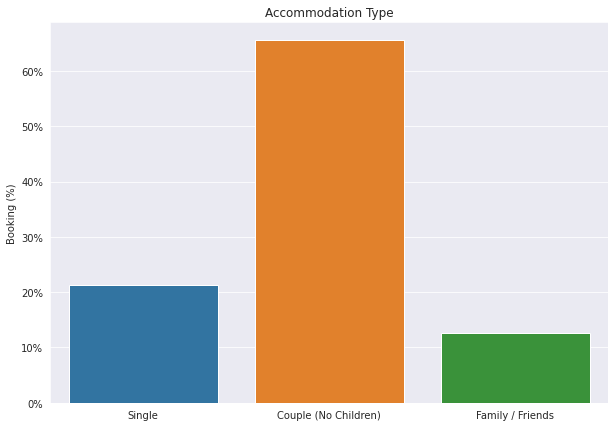

In [39]:
## Select single, couple, multiple adults and family
single   = df_not_canceled[(df_not_canceled.adults==1) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
couple   = df_not_canceled[(df_not_canceled.adults==2) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
family   = df_not_canceled[df_not_canceled.adults + df_not_canceled.children + df_not_canceled.babies > 2]


## Make the list of Category names, and their total percentage
names = ['Single', 'Couple (No Children)', 'Family / Friends']
count = [single.shape[0],couple.shape[0], family.shape[0]]
count_percent = [x/df_not_canceled.shape[0]*100 for x in count]


## Draw the curve
plot(names,count_percent,  y_label='Booking (%)', title='Accommodation Type', figsize=(10,7))

## Couple (or 2 adults) is the most popular accommodation type. So hotels can make plans accordingly

# Feature Selection and Feature Engineering

### Before we start making a predictive model. let’s do the Feature selection and feature engineering. 
#### First, make a copy of dataframe.

In [40]:
df_subset = df.copy()

### We have two features in our dataset reserved_room_type and another is assigned_room_type. We will make the new feature let’s call it Room which will contain 1 if the guest was assigned the same room that was reserved else 0. Guest can cancel the booking if he did not get the same room. clever right?

### Another feature will be net_cancelled. It will contain 1 If the current customer has canceled more bookings in the past than the number of bookings he did not cancel, else 0.

In [41]:
## Make the new column which contain 1 if guest received the same room which was reserved otherwise 0
df_subset['Room'] = 0
df_subset.loc[ df_subset['reserved_room_type'] == df_subset['assigned_room_type'] , 'Room'] = 1


## Make the new column which contain 1 if the guest has cancelled more booking in the past
## than the number of booking he did not cancel, otherwise 0

df_subset['net_cancelled'] = 0
df_subset.loc[ df_subset['previous_cancellations'] > df_subset['previous_bookings_not_canceled'] , 'net_cancelled'] = 1

### Now remove these unnecessary features

In [42]:
## Remove the less important features
df_subset = df_subset.drop(['arrival_date_year','arrival_date_week_number','arrival_date_day_of_month',
                            'arrival_date_month','assigned_room_type','reserved_room_type','reservation_status_date',
                            'previous_cancellations','previous_bookings_not_canceled'],axis=1)


### Let’s also remove the reservation_status. Even though it is a very important feature, but it already has information about canceled booking. Further, It can only have information after the booking was canceled or the guest checked in. So it will not be useful to use this feature in our predictive model. Because for the future prediction we won’t have information about the reservation status.

In [43]:
## Remove reservation_status column
## because it tells us if booking was cancelled 
df_subset = df_subset.drop(['reservation_status'], axis=1)

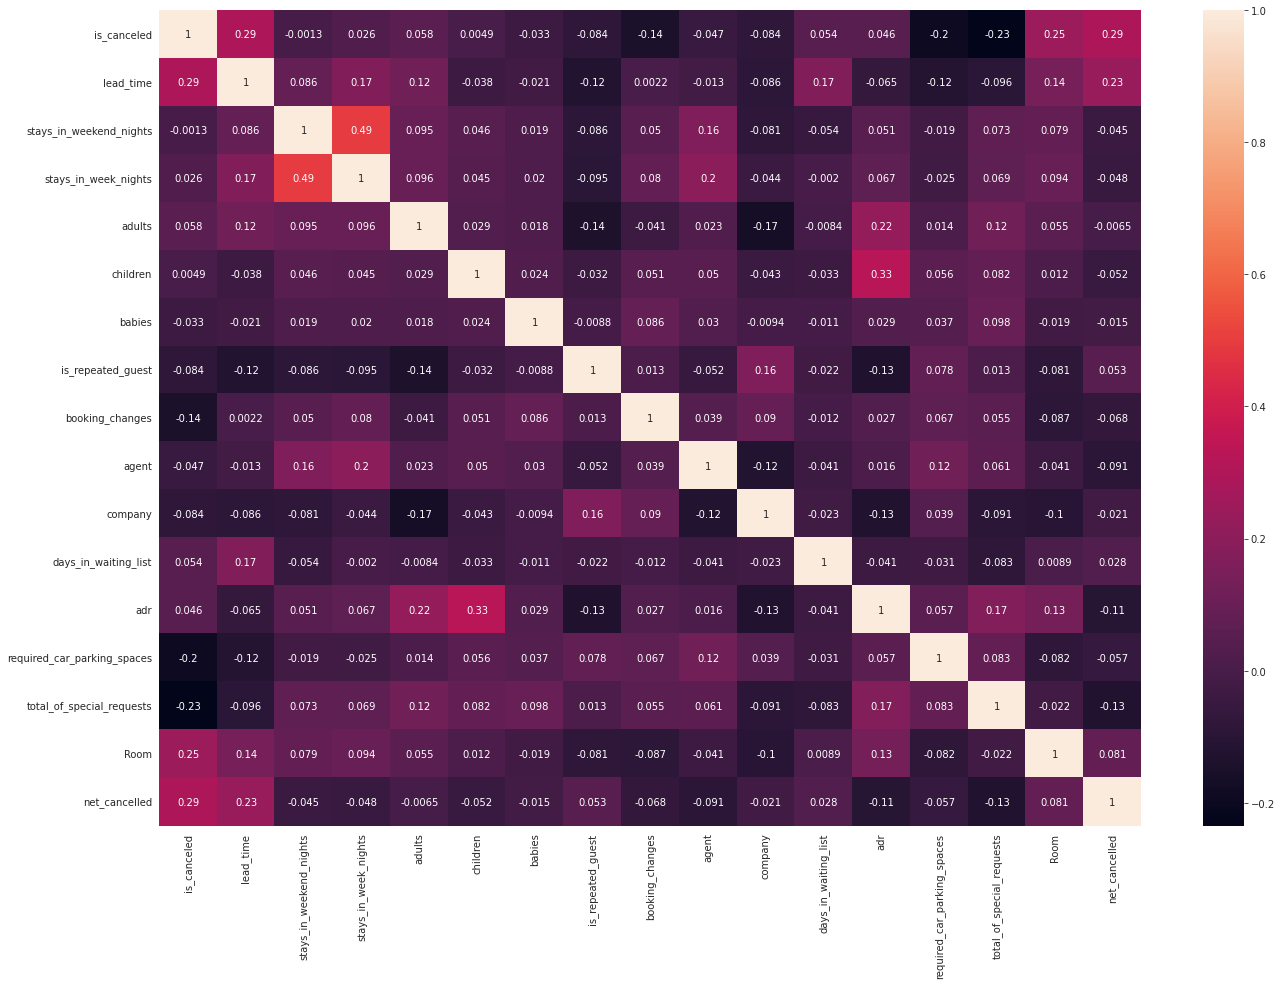

In [44]:
## Plot the heatmap to see correlation with columns
fig, ax = plt.subplots(figsize=(22,15))
sns.heatmap(df_subset.corr(), annot=True, ax=ax);

### We can see our new features, Room and net_cancelled have a higher correlation with is_cancelled than most of the other columns.

## Modeling
### 1. Converting Categorical variables to Numerical
### Let’s convert categorical values into numerical form.
#### We will use LabelEncoder from Sklearn to encode in an ordinal fashion.


In [45]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_subset['country']=encoder.fit_transform(df_subset['country'])

In [46]:
df_subset['market_segment']=encoder.fit_transform(df_subset['market_segment'])
df_subset['distribution_channel'] = encoder.fit_transform(df_subset['distribution_channel'])
df_subset['deposit_type'] = encoder.fit_transform(df_subset['deposit_type'])
df_subset['customer_type'] = encoder.fit_transform(df_subset['customer_type'])
df_subset['meal'] = encoder.fit_transform(df_subset['meal'])

In [47]:
df_subset['hotel'] = df_subset['hotel'].replace(['City Hotel','Resort Hotel'],[1.0,2.0])

## 2. Train Test Split
### Now let’s split the dataset into train and test. The default size of the split ratio is 3:1

In [48]:
from sklearn.model_selection import train_test_split
X = df_subset.drop(columns = ['is_canceled'],axis=1)
Y = df_subset['is_canceled']
x_train, x_test, y_train, y_test = train_test_split(X,Y,random_state=0,test_size=0.2)

## 3. Machine Learning Model (Decision Tree)
### We will use the decision as our predicting model. Let’s fit the data.

In [49]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy')

In [50]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [51]:
y_predict = clf.predict(x_test)

In [52]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_predict,y_test)

In [53]:
print("The Accuracy Is : ",accuracy * 100,"%")

The Accuracy Is :  85.74364566730979 %


In [55]:
def Score(clf,x_train,y_train,x_test,y_test):
    train_score = clf.score(x_train,y_train)
    test_score = clf.score(x_test,y_test)

    print("========================================")
    print(f'Training Accuracy of our model is: {train_score}')
    print(f'Test Accuracy of our model is: {test_score}')
    print("========================================")
    
    
Score(clf,x_train,y_train,x_test,y_test)

Training Accuracy of our model is: 0.9954911500713027
Test Accuracy of our model is: 0.8574364566730979


# Classification Report

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89     14919
           1       0.81      0.81      0.81      8923

    accuracy                           0.86     23842
   macro avg       0.85      0.85      0.85     23842
weighted avg       0.86      0.86      0.86     23842



# Confusion Matrix

Normalized confusion matrix
[[0.88397346 0.11602654]
 [0.18693265 0.81306735]]


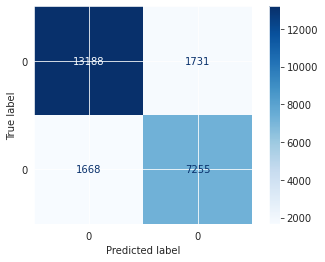

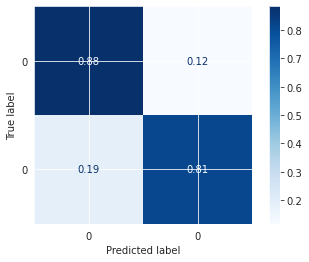

In [61]:
from sklearn.metrics import ConfusionMatrixDisplay
class_names = df_subset.is_canceled
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
  disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        x_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
print(title)
print(disp.confusion_matrix)

plt.show()

# Predictive Model

In [69]:
## Getting Prediciton of nth record of x_train
prediction = clf.predict(x_train.iloc[8].values.reshape(1,-1))

## Actual Value of nth record of x_train from y_train
actual_value = y_train.iloc[8]

print(f'Predicted Value \t: {prediction[0]}')
print(f'Actual Value\t\t: {actual_value}')
if (prediction[0] == 0):
   print('Booking will be canceled')
else:
   print('Booking will not be canceled')

Predicted Value 	: 0
Actual Value		: 0
Booking will be canceled


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


# Conclusion

### We used the dataset that contains data about hotel bookings
### We cleaned and preprocessed the data and then we performed the exploratory data analysis to extract information from the data

## We learned that

### 1. Almost 35% of bookings were canceled.

### 2. More than 60% of the population booked the City hotel.

### 3. More than double bookings were made in 2016, compared to the previous year. But the bookings decreased by almost 15% next year.

### 4. Most bookings were made from July to August. And the least bookings were made at the start and end of the year.

### 5. Portugal, the UK, and France, Spain and Germany are the top countries from most guests come, more than 80% come from these 5 countries.

### 6. Most people stay for one, two, or three.-> For Resort hotel, the most popular stay duration is three, two, one, and four days respectively.-> For City hotel, most popular stay duration is one, two, seven(week), and three respectively.

### 7. Couple (or 2 adults) is the most popular accommodation type. So hotels can make arrangement plans accordingly

### **We then performed feature selection and feature engineering, and then made the predictive model using the Decision Tree to predict whether our customer/guest will cancel the booking or not. And we achieved 85.7% accuracy.**